# Expressibility of the embedding circuit

Expressibility $\epsilon_{\mathbb{U}}^{(t,p)}(X)$ is defined by

\begin{aligned}
    \epsilon_{\mathbb{U}}^{(t,p)}(X) &:= \|A_{\mathbb{U}}^{(t)}(X)\|_p\\
    \mathcal{A}_{\mathbb{U}}^{(t)}(X) &:= \int_{V\in\mathcal{U}(d)} d\mu_{\mathrm{Haar}}(V)\,V^{\otimes t}X^{\otimes t}(V^\dagger)^{\otimes t} - \int_{U\in\mathbb{U}} dU\,U^{\otimes t}X^{\otimes t}(U^\dagger)^{\otimes t}
\end{aligned}


, where $\|\cdot\|_p$ is Schatten $p$-norm, and $X$ is either an input state or an observable.

Since we are interested in whether circuit of interest forms quantum 2-design, we will only consider the case of $t=2$.

---
For $\epsilon_{\mathbb{U}}^{(2,2)}(X) = \|A_{\mathbb{U}}^{(2)}(X)\|_2$, the expressibility is redefined by frame potential as follows:

\begin{aligned}
    \epsilon_{\mathbb{U}}^{(2,2)}(X) &:= \sqrt{\mathcal{F}_{\mathbb{U}}^{(2)}(X) - \mathcal{F}_{Haar}^{(2)}(X) }\\
    \mathcal{F}_{\mathbb{U}}^{(2)}(X) &:= \int_{W\in\mathbb{U}}\int_{V\in\mathbb{U}} dWdV \operatorname{Tr}[XW^\dagger VX^\dagger V^\dagger W]^2,\\
    \mathcal{F}_{\mathbb{U}}^{(2)}(X) &:= \int_{W\in\mathcal{U}}\int_{V\in\mathcal{U}} d\mu_{\mathrm{Haar}}(W)d\mu_{\mathrm{Haar}}(V) \operatorname{Tr}[XW^\dagger VX^\dagger V^\dagger W]^2.
\end{aligned}

When quantifying the expressibility of the embedding circuit, $ X = |0\rangle\langle0| $ is used. Then,
\begin{aligned}
    (\epsilon_{\mathbb{U}}^{(2,2)}(|0\rangle\langle0|))^2 = \int_{W\in\mathbb{U}}\int_{V\in\mathbb{U}} dWdV |\langle0|W^\dagger V|0\rangle|^4 - \frac{1}{2^{n-1}(2^n + 1)}
\end{aligned}

## 1. Estimate the expressibility with Schatten 2-norm: $\epsilon_{\mathbb{U}}^{(2,2)}(X) = \|A_{\mathbb{U}}^{(2)}(X)\|_2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('..')
from src.expressibility import *
from src.do_all_expressibility_2norm import *

In [2]:
# set parameters
circuit_types = ['TPA', 'HEA', 'ALT']
nqubits_list = np.arange(2, 7)
nlayers_list = [1,2,3,4,5,6]
nsamples = 5*10**3

In [3]:
# exp2_all = do_all(circuit_types, nqubits_list, nlayers_list, nsamples)

In [12]:
# # save data
# l = exp2_all
# path = "../results/data/exp2_all.pkl"

# with open(path, "wb") as f:
#     pickle.dump(l, f)

In [4]:
# load data
path = "../results/data/exp2_all.pkl"

with open(path, "rb") as f:
    exp2_all = pickle.load(f)

### 1.1. TPA

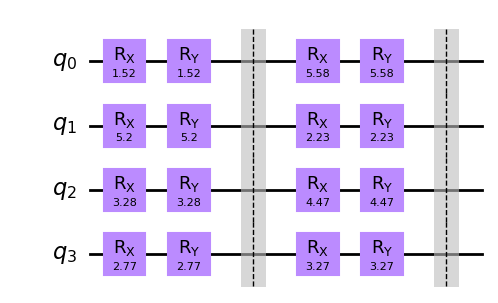

In [7]:
# show circuit
nqubits = 4
nlayers = 2
exp = GenerateCircuit('TPA', nqubits, nlayers)
exp.generate_circuit(np.random.uniform(0, 2*np.pi, 2*nqubits*nlayers))
exp.circuit.draw('mpl')

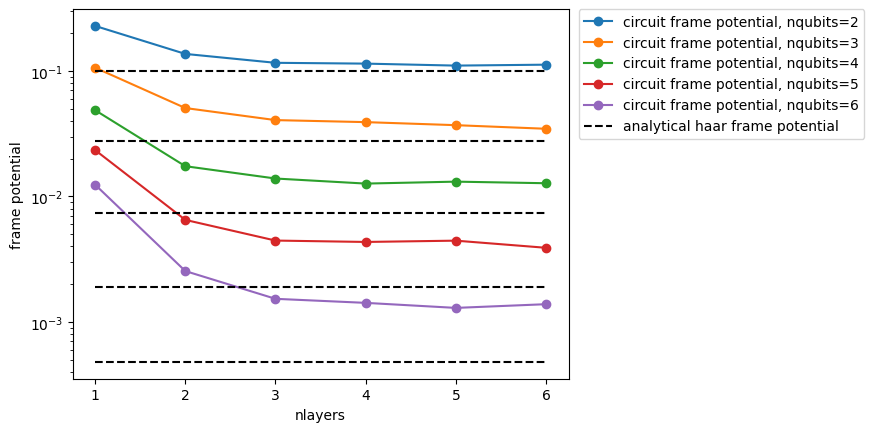

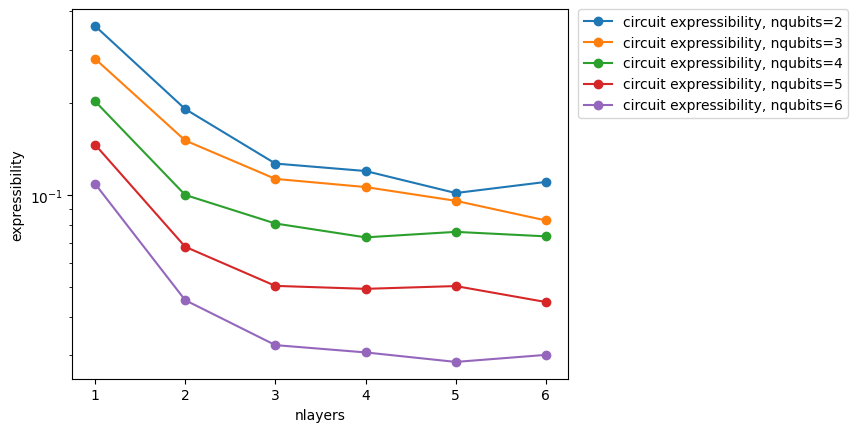

In [10]:
exp2_all.plot_all('TPA')

### 1.2. ALT

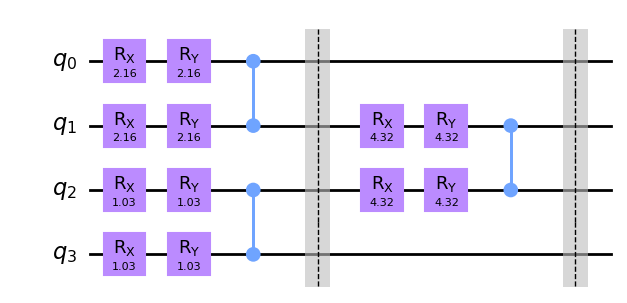

In [8]:
# show circuit
nqubits = 4
nlayers = 2
exp = GenerateCircuit('ALT', nqubits, nlayers)
exp.generate_circuit(np.random.uniform(0, 2*np.pi, 2*nqubits*nlayers))
exp.circuit.draw('mpl')

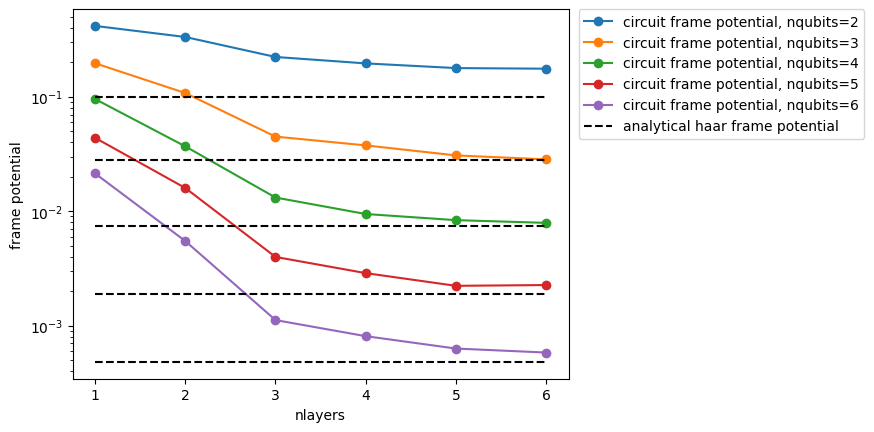

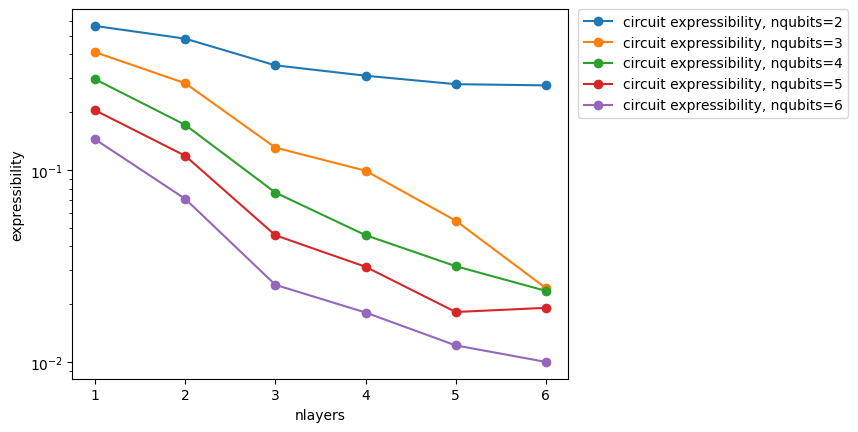

In [11]:
exp2_all.plot_all('ALT')

### 1.3. HEA

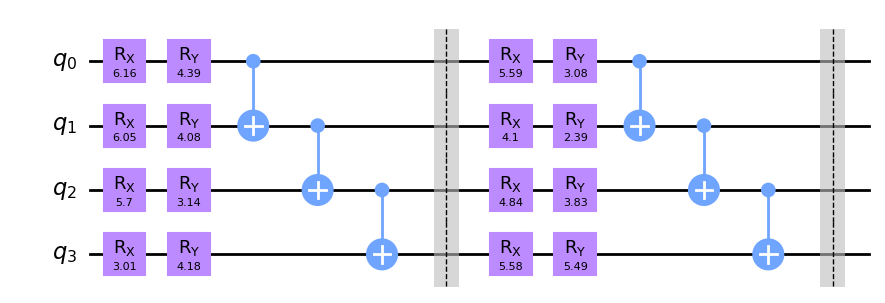

In [9]:
# show circuit
nqubits = 4
nlayers = 2
exp = GenerateCircuit('HEA', nqubits, nlayers)
exp.generate_circuit(np.random.uniform(0, 2*np.pi, 2*nqubits*nlayers))
exp.circuit.draw('mpl')

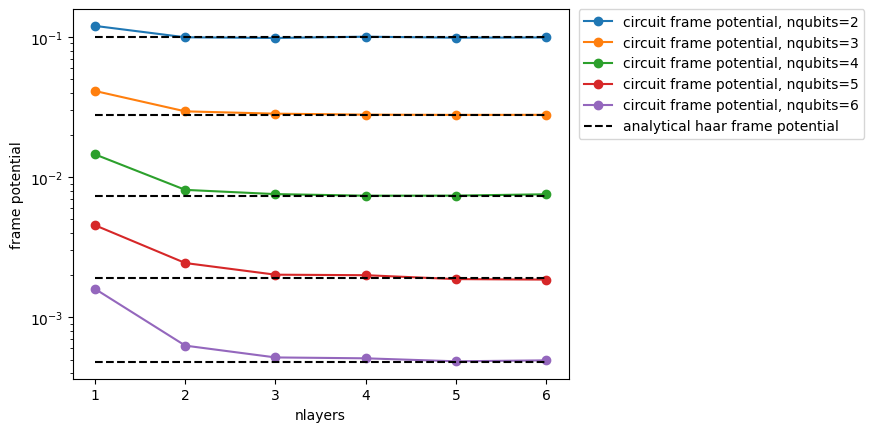

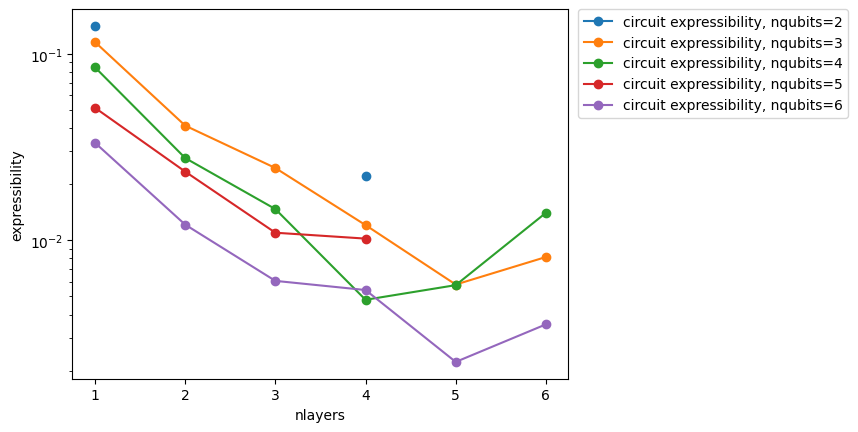

In [12]:
exp2_all.plot_all('HEA')

#### Because the circuit frame potential converges to the analytical haar frame potential so quickly as the number of layers increases, it seems difficult to estimate the expressibility, which is defined by $\sqrt{\mathcal{F}_{\mathbb{U}}^{(2)}(X) - \mathcal{F}_{Haar}^{(2)}(X) }$.

## 2. Estimate the expressibility with Schatten 1-norm: $\epsilon_{\mathbb{U}}^{(2,1)}(X) = \|A_{\mathbb{U}}^{(2)}(X)\|_1$

#### $\epsilon_{\mathbb{U}}^{(2,1)}(X) = \|A_{\mathbb{U}}^{(2)}(X)\|_1 = \operatorname{Tr}|\int_{V\in\mathcal{U}(d)} d\mu_{\mathrm{Haar}}(V)\,V^{\otimes 2}X^{\otimes 2}(V^\dagger)^{\otimes 2} - \int_{U\in\mathbb{U}} dU\,U^{\otimes 2}X^{\otimes 2}(U^\dagger)^{\otimes 2}|$

#### The first term in the trace is estimated as follows: $ \int_{V\in\mathcal{U}(d)} d\mu_{\mathrm{Haar}}(V)\,V^{\otimes 2}X^{\otimes 2}(V^\dagger)^{\otimes 2} = (\mathbb{I}_{d^2} + F)/d(d+1)$, where $F$ is SWAP: $ \sum_{i,j=1}^d |ij\rangle\langle ji|$ and $X=|0\rangle\langle0|^{\otimes n}$

ref: http://arxiv.org/abs/1408.3782 Eq. (3.27)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('..')
from src.expressibility import *

In [19]:
nqubits = 1
nlayers_list = [1,10,30]
nsamples_list = [100,1000,10000]

expressibility_1norm_samples_each_nsamples = []
for nsamples in nsamples_list:
    expressibility_1norm_samples_each_nlayers = []
    for nlayers in nlayers_list:
        exp = EXPRESSIBILITY_1NORM('HEA', nqubits, nlayers, nsamples)
        expressibility_1norm_samples_each_nlayers.append(exp.expressibility())
    expressibility_1norm_samples_each_nsamples.append(expressibility_1norm_samples_each_nlayers)

In [20]:
l = expressibility_1norm_samples_each_nsamples
path = "..results/data/expressibility_1norm_samples_each_nsamples.pkl"

with open(path, "wb") as f:
    pickle.dump(l, f)

In [28]:
with open(path, "rb") as f:
    expressibility_1norm_samples_each_nsamples = pickle.load(f)

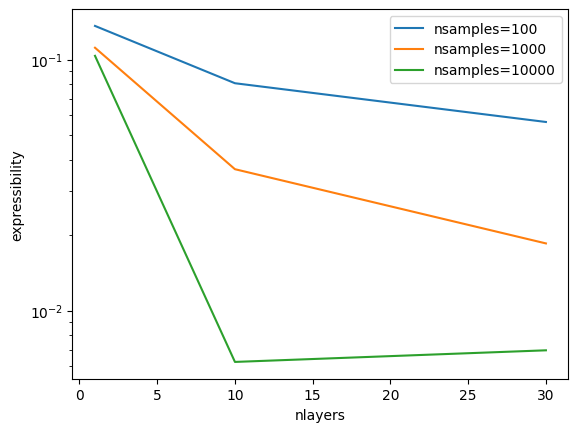

In [29]:
for i in range(len(nsamples_list)):
    plt.semilogy(nlayers_list, expressibility_1norm_samples_each_nsamples[i], label=f'nsamples={nsamples_list[i]}')
plt.xlabel('nlayers')
plt.ylabel('expressibility')
plt.legend()
plt.show()

### The expressibility should converge to 0 as the number of layers increases, but it seems there exists a limit to estimate the expressibility for each number of samples.

In [63]:
circuit_types = ['HEA']
nqubits_list = np.arange(2, 5)
nlayers_list = [1,2,3,4,5,6]
nsamples = 10**4

In [64]:
expressibility_1norm_samples_each_circuit_type = []
for circuit_type in circuit_types:
    expressibility_1norm_samples_each_nqubits = []
    for nqubits in nqubits_list:
        expressibility_1norm_samples_each_nlayers = []
        for nlayers in nlayers_list:
            exp = EXPRESSIBILITY_1NORM(nqubits, nlayers, nsamples)
            expressibility_1norm_samples_each_nlayers.append(exp.expressibility())
        expressibility_1norm_samples_each_nqubits.append(expressibility_1norm_samples_each_nlayers)
expressibility_1norm_samples_each_circuit_type.append(expressibility_1norm_samples_each_nqubits)

In [65]:
l = expressibility_1norm_samples_each_circuit_type
path = "..results/data/expressibility_1norm_samples_each_circuit_type.pkl"

with open(path, "wb") as f:
    pickle.dump(l, f)

In [66]:
path = "..results/data/expressibility_1norm_samples_each_circuit_type.pkl"
with open(path, "rb") as f:
    expressibility_1norm_samples_each_circuit_type = pickle.load(f)

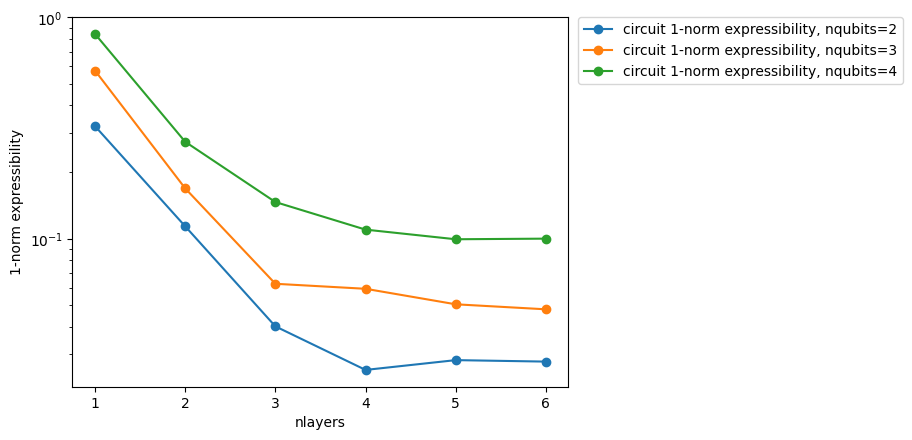

In [67]:
for i in range(len(nqubits_list)):
    plt.semilogy(nlayers_list, expressibility_1norm_samples_each_circuit_type[0][i], label=f'circuit 1-norm expressibility, nqubits={nqubits_list[i]}', marker='o')

plt.xlabel('nlayers')
plt.ylabel('1-norm expressibility')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()